In [1]:
import yfinance as yf
import pandas as pd
from datetime import date

# Define the stock and the time period
ticker_symbol = "RELIANCE.NS"
start_date = "2020-01-01"
end_date = date.today().strftime("%Y-%m-%d")
try:
    print(f"Downloading 5 years of stock data for {ticker_symbol}...")
    stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)

    if not stock_df.empty:
        file_path = "reliance_stock_data_5_years.csv"
        stock_df.to_csv(file_path)
        print(f"✅ Success! Data downloaded and saved to '{file_path}'")
        print(f"Data shape: {stock_df.shape}")
        display(stock_df.tail())
    else:
        print("❌ Download failed. The returned data was empty.")

except Exception as e:
    print(f"An error occurred: {e}")

/tmp/ipykernel_2347/1613629470.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed

✅ Success! Data downloaded and saved to 'reliance_stock_data_5_years.csv'
Data shape: (1476, 5)


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-12-08,1543.000000,1551.000000,1535.000000,1539.199951,11301491
2025-12-09,1529.400024,1542.500000,1520.099976,1540.300049,11503971
2025-12-10,1536.900024,1547.500000,1531.400024,1534.000000,7991629
2025-12-11,1545.000000,1550.000000,1524.000000,1536.900024,4706197
2025-12-12,1556.500000,1559.800049,1546.099976,1550.800049,5106655


In [2]:
!pip install gnews

In [3]:
import pandas as pd
from gnews import GNews
import time
from datetime import datetime

# This list will store all the articles we find
all_news = []
start_year = 2020
end_year = datetime.now().year

print(f"Starting deep news search from {start_year} to {end_year}. This will take a long time...")

# Loop through each year and each month
for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        # Stop if we are in the future
        if year == end_year and month > datetime.now().month:
            break
            
        print(f"Fetching news for month: {year}-{month:02d}...")
        
        # Define the start and end date for the current month
        start_date = (year, month, 1)
        if month == 12:
            end_date = (year + 1, 1, 1)
        else:
            end_date = (year, month + 1, 1)
            
        # Initialize GNews for this specific time period
        google_news = GNews(language='en', country='IN', start_date=start_date, end_date=end_date)
        
        # Get the news and add it to our master list
        monthly_news = google_news.get_news('Reliance Industries')
        if monthly_news:
            all_news.extend(monthly_news)
        
        # Be polite to the server and wait 1 second between requests
        time.sleep(1)

# --- Process the final, large dataset ---
if all_news:
    news_df = pd.DataFrame(all_news)
    
    # Clean up and save the data
    news_df = news_df[['published date', 'title', 'publisher']]
    news_df.rename(columns={'published date': 'date', 'publisher': 'source'}, inplace=True)
    
    file_path = "reliance_news_data_FULL.csv"
    news_df.to_csv(file_path, index=False)
    
    print(f"\n✅ FULL news download complete! Data saved to '{file_path}'")
    print(f"Total articles found: {len(news_df)}")
    display(news_df.head())
else:
    print("❌ No articles were found with the deep search.")

Starting deep news search from 2020 to 2025. This will take a long time...


Fetching news for month: 2020-01...


Fetching news for month: 2020-02...


Fetching news for month: 2020-03...


Fetching news for month: 2020-04...


Fetching news for month: 2020-05...


Fetching news for month: 2020-06...


Fetching news for month: 2020-07...


Fetching news for month: 2020-08...


Fetching news for month: 2020-09...


Fetching news for month: 2020-10...


Fetching news for month: 2020-11...


Fetching news for month: 2020-12...


Fetching news for month: 2021-01...


Fetching news for month: 2021-02...


Fetching news for month: 2021-03...


Fetching news for month: 2021-04...


Fetching news for month: 2021-05...


Fetching news for month: 2021-06...


Fetching news for month: 2021-07...


Fetching news for month: 2021-08...


Fetching news for month: 2021-09...


Fetching news for month: 2021-10...


Fetching news for month: 2021-11...


Fetching news for month: 2021-12...


Fetching news for month: 2022-01...


Fetching news for month: 2022-02...


Fetching news for month: 2022-03...


Fetching news for month: 2022-04...


Fetching news for month: 2022-05...


Fetching news for month: 2022-06...


Fetching news for month: 2022-07...


Fetching news for month: 2022-08...


Fetching news for month: 2022-09...


Fetching news for month: 2022-10...


Fetching news for month: 2022-11...


Fetching news for month: 2022-12...


Fetching news for month: 2023-01...


Fetching news for month: 2023-02...


Fetching news for month: 2023-03...


Fetching news for month: 2023-04...


Fetching news for month: 2023-05...


Fetching news for month: 2023-06...


Fetching news for month: 2023-07...


Fetching news for month: 2023-08...


Fetching news for month: 2023-09...


Fetching news for month: 2023-10...


Fetching news for month: 2023-11...


Fetching news for month: 2023-12...


Fetching news for month: 2024-01...


Fetching news for month: 2024-02...


Fetching news for month: 2024-03...


Fetching news for month: 2024-04...


Fetching news for month: 2024-05...


Fetching news for month: 2024-06...


Fetching news for month: 2024-07...


Fetching news for month: 2024-08...


Fetching news for month: 2024-09...


Fetching news for month: 2024-10...


Fetching news for month: 2024-11...


Fetching news for month: 2024-12...


Fetching news for month: 2025-01...


Fetching news for month: 2025-02...


Fetching news for month: 2025-03...


Fetching news for month: 2025-04...


Fetching news for month: 2025-05...


Fetching news for month: 2025-06...


Fetching news for month: 2025-07...


Fetching news for month: 2025-08...


Fetching news for month: 2025-09...


Fetching news for month: 2025-10...


Fetching news for month: 2025-11...


Fetching news for month: 2025-12...



✅ FULL news download complete! Data saved to 'reliance_news_data_FULL.csv'
Total articles found: 5032


,date,title,source
0,"Wed, 29 Jan 2020 08:00:00 GMT",Reliance Industries plans to market ‘Plastic t...,{'href': 'https://www.thehindubusinessline.com...
1,"Mon, 06 Jan 2020 08:00:00 GMT",Is 2020 The Year That Reliance Becomes India's...,"{'href': 'https://variety.com', 'title': 'Vari..."
2,"Thu, 02 Jan 2020 08:00:00 GMT",Reliance Industries is starting to roll out it...,"{'href': 'https://www.businessinsider.com', 't..."
3,"Thu, 02 Jan 2020 08:00:00 GMT",Mukesh Ambani: Asia's richest man takes on ret...,"{'href': 'https://www.bbc.com', 'title': 'BBC'}"
4,"Tue, 21 Jan 2020 08:00:00 GMT",Mukesh Ambani's Reliance Industries is India's...,"{'href': 'https://www.livemint.com', 'title': ..."


In [4]:
import pandas as pd

file_path = "reliance_stock_data_5_years.csv"

print("Starting the one-time fix for the stock data CSV file...")

try:
    # Step 1: Load the messy CSV file using our robust command
    clean_df = pd.read_csv(
        file_path,
        index_col=0,
        parse_dates=True,
        skiprows=[1, 2]
    )
    clean_df.index.name = 'Date'
    print(" -> Successfully loaded the messy data into memory.")

    # Step 2: Save the clean DataFrame back to the SAME file path
    # This will OVERWRITE the old, messy file with a clean one.
    clean_df.to_csv(file_path)
    print(f" -> Successfully saved a clean version back to '{file_path}'.")

    print("\n✅✅✅ PERMANENT FIX COMPLETE ✅✅✅")
    print("The stock data CSV file is now permanently fixed. You will not see this error again.")

except Exception as e:
    print(f"An error occurred during the fix: {e}")

Starting the one-time fix for the stock data CSV file...
 -> Successfully loaded the messy data into memory.
 -> Successfully saved a clean version back to 'reliance_stock_data_5_years.csv'.

✅✅✅ PERMANENT FIX COMPLETE ✅✅✅
The stock data CSV file is now permanently fixed. You will not see this error again.


In [5]:
!conda install -c conda-forge nltk -y

CI detected...
By accessing https://repo.anaconda.com/pkgs/main via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
By accessing https://repo.anaconda.com/pkgs/r via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
2 channel Terms of Service accepted
Retrieving notices: - 

\ 

done


Channels:
 - conda-forge
 - defaults
Platform: linux-64

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

done
Solving environment: | 

/ 

done




==> WARNING: A newer version of conda exists. <==
    current version: 25.9.1
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c defaults conda





## Package Plan ##

  environment location: /usr/share/miniconda

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.12 |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2025.11.12         |     pyhd8ed1ab_0         153 KB  conda-forge
    conda-25.11.0              |  py313h78bf25f_0         1.2 MB  conda-forge
    joblib-1.5.2               |     pyhd8ed1ab_0         219 KB  conda-forge
    nltk-3.9.2                 |     pyhcf101f3_1         1.1 MB  conda-forge
    openssl-3.6.0              |       h26f9b46_0         3.0 MB  conda-forge
    regex-2025.11.3            |  py313h07c4f96_1         402 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  joblib             conda-



nltk-3.9.2           | 1.1 MB    |                                       |   0% 


regex-2025.11.3      | 402 KB    |                                       |   0% 



joblib-1.5.2         | 219 KB    |                                       |   0% 




certifi-2025.11.12   | 153 KB    |                                       |   0% 





ca-certificates-2025 | 149 KB    |                                       |   0% 

openssl-3.6.0        | 3.0 MB    | 1                                     |   1% 


regex-2025.11.3      | 402 KB    | #4                                    |   4% 


regex-2025.11.3      | 402 KB    | ##################################### | 100% 



joblib-1.5.2         | 219 KB    | ##6                                   |   7% 

nltk-3.9.2           | 1.1 MB    | 5                                     |   1% 
conda-25.11.0        | 1.2 MB    | 4                                     |   1% 



joblib-1.5.2         | 219 KB    | ##################################### | 100% 






certifi-2025.11.12   | 153 KB    | ###8                                  |  10% 




certifi-2025.11.12   | 153 KB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ###9                                  |  11% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 



openssl-3.6.0        | 3.0 MB    | ####################################3 |  98% 
conda-25.11.0        | 1.2 MB    | ##################################### | 100% 




certifi-2025.11.12   | 153 KB    | ##################################### | 100% 


regex-2025.11.3      | 402 KB    | ##################################### | 100% 


openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 







ca-certificates-2025 | 149 KB    | ##################################### | 100% 





joblib-1.5.2         | 219 KB    | ##################################### | 100% 



joblib-1.5.2         | 219 KB    | ##################################### | 100% 



nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 

nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 

openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 
conda-25.11.0        | 1.2 MB    | ##################################### | 100% 

                                                                                

                                                                                


                                                                                



                                                                                




                                                                                






Preparing transaction: \ 

done
Verifying transaction: / 

- 

done
Executing transaction: | 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

done


In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- NLTK Setup ---
# This directly downloads the required resources.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# --------------------

# Initialize the tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans a text string by making it lowercase, removing punctuation,
    numbers, stopwords, and then lemmatizing the words.
    """
    if not isinstance(text, str):
        return ""
        
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = text.lower().split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(cleaned_words)

print("✅ The clean_text function is now ready to use.")

[nltk_data] Downloading package stopwords to /home/runner/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/runner/nltk_data...


✅ The clean_text function is now ready to use.


[nltk_data] Downloading package omw-1.4 to /home/runner/nltk_data...


In [7]:
import pandas as pd

# Load the full news dataset from the CSV file
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)

# Apply our cleaning function to the 'title' column
print("Cleaning all news headlines... this may take a minute.")
news_df['cleaned_title'] = news_df['title'].apply(clean_text)
print("✅ Text cleaning complete.")

# Display the original and cleaned titles to see the result
display(news_df[['title', 'cleaned_title']].head())

Cleaning all news headlines... this may take a minute.


✅ Text cleaning complete.


,title,cleaned_title
0,Reliance Industries plans to market ‘Plastic t...,reliance industry plan market plastic road ini...
1,Is 2020 The Year That Reliance Becomes India's...,year reliance becomes india digital champion v...
2,Reliance Industries is starting to roll out it...,reliance industry starting roll new ecommerce ...
3,Mukesh Ambani: Asia's richest man takes on ret...,mukesh ambani asia richest man take retail gia...
4,Mukesh Ambani's Reliance Industries is India's...,mukesh ambanis reliance industry india answer ...


In [8]:
import os
import shutil
from pathlib import Path

# Define the cache directory
cache_dir = Path.home() / ".cache" / "huggingface"

try:
    if os.path.exists(cache_dir):
        print(f"Found cache directory at: {cache_dir}")
        shutil.rmtree(cache_dir)
        print("✅ Hugging Face cache has been cleared successfully.")
    else:
        print("Cache directory not found, no action needed.")

except Exception as e:
    print(f"An error occurred while clearing the cache: {e}")

Cache directory not found, no action needed.


In [9]:
import pandas as pd
import torch
# --- CHANGE 1: Import the specific BERT model class ---
from transformers import AutoTokenizer, BertForSequenceClassification

# --- 1. Load the FinBERT Model and Tokenizer ---
print("Loading FinBERT model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# --- CHANGE 2: Use the specific class to load the model ---
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")
print("✅ Model and tokenizer loaded.")

# --- 2. Load Your Cleaned News Data ---
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)
news_df.dropna(subset=['title'], inplace=True)
news_df['cleaned_title'] = news_df['title'].apply(clean_text)

# --- 3. Define a Function for Batch Sentiment Analysis ---
def get_finbert_sentiments(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_labels = [model.config.id2label[label_id] for label_id in torch.argmax(predictions, dim=1).tolist()]
    return sentiment_labels

# --- 4. Process the Headlines in Batches ---
print("\nStarting sentiment analysis with FinBERT. This will take a very long time...")
batch_size = 64
all_sentiments = []
titles_to_process = news_df['cleaned_title'].tolist()

for i in range(0, len(titles_to_process), batch_size):
    batch = titles_to_process[i:i + batch_size]
    sentiments = get_finbert_sentiments(batch)
    all_sentiments.extend(sentiments)
    print(f"  Processed {min(i + batch_size, len(titles_to_process))}/{len(titles_to_process)} headlines...")

# --- 5. Add Sentiments to DataFrame ---
news_df['finbert_sentiment'] = all_sentiments
print("\n✅ FinBERT sentiment analysis complete.")
display(news_df[['cleaned_title', 'finbert_sentiment']].head())

# Save the results to a new CSV
news_df.to_csv("reliance_news_with_finbert_sentiment.csv", index=False)
print("✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'")

2025-12-15 03:20:19.445111: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


12/15/2025 03:20:22 AM - Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Can not load face (unknown file format; error code 0x2)


12/15/2025 03:20:22 AM - generated new fontManager


Loading FinBERT model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

✅ Model and tokenizer loaded.



Starting sentiment analysis with FinBERT. This will take a very long time...


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

  Processed 64/5032 headlines...


  Processed 128/5032 headlines...


  Processed 192/5032 headlines...


  Processed 256/5032 headlines...


  Processed 320/5032 headlines...


  Processed 384/5032 headlines...


  Processed 448/5032 headlines...


  Processed 512/5032 headlines...


  Processed 576/5032 headlines...


  Processed 640/5032 headlines...


  Processed 704/5032 headlines...


  Processed 768/5032 headlines...


  Processed 832/5032 headlines...


  Processed 896/5032 headlines...


  Processed 960/5032 headlines...


  Processed 1024/5032 headlines...


  Processed 1088/5032 headlines...


  Processed 1152/5032 headlines...


  Processed 1216/5032 headlines...


  Processed 1280/5032 headlines...


  Processed 1344/5032 headlines...


  Processed 1408/5032 headlines...


  Processed 1472/5032 headlines...


  Processed 1536/5032 headlines...


  Processed 1600/5032 headlines...


  Processed 1664/5032 headlines...


  Processed 1728/5032 headlines...


  Processed 1792/5032 headlines...


  Processed 1856/5032 headlines...


  Processed 1920/5032 headlines...


  Processed 1984/5032 headlines...


  Processed 2048/5032 headlines...


  Processed 2112/5032 headlines...


  Processed 2176/5032 headlines...


  Processed 2240/5032 headlines...


  Processed 2304/5032 headlines...


  Processed 2368/5032 headlines...


  Processed 2432/5032 headlines...


  Processed 2496/5032 headlines...


  Processed 2560/5032 headlines...


  Processed 2624/5032 headlines...


  Processed 2688/5032 headlines...


  Processed 2752/5032 headlines...


  Processed 2816/5032 headlines...


  Processed 2880/5032 headlines...


  Processed 2944/5032 headlines...


  Processed 3008/5032 headlines...


  Processed 3072/5032 headlines...


  Processed 3136/5032 headlines...


  Processed 3200/5032 headlines...


  Processed 3264/5032 headlines...


  Processed 3328/5032 headlines...


  Processed 3392/5032 headlines...


  Processed 3456/5032 headlines...


  Processed 3520/5032 headlines...


  Processed 3584/5032 headlines...


  Processed 3648/5032 headlines...


  Processed 3712/5032 headlines...


  Processed 3776/5032 headlines...


  Processed 3840/5032 headlines...


  Processed 3904/5032 headlines...


  Processed 3968/5032 headlines...


  Processed 4032/5032 headlines...


  Processed 4096/5032 headlines...


  Processed 4160/5032 headlines...


  Processed 4224/5032 headlines...


  Processed 4288/5032 headlines...


  Processed 4352/5032 headlines...


  Processed 4416/5032 headlines...


  Processed 4480/5032 headlines...


  Processed 4544/5032 headlines...


  Processed 4608/5032 headlines...


  Processed 4672/5032 headlines...


  Processed 4736/5032 headlines...


  Processed 4800/5032 headlines...


  Processed 4864/5032 headlines...


  Processed 4928/5032 headlines...


  Processed 4992/5032 headlines...


  Processed 5032/5032 headlines...

✅ FinBERT sentiment analysis complete.


,cleaned_title,finbert_sentiment
0,reliance industry plan market plastic road ini...,neutral
1,year reliance becomes india digital champion v...,neutral
2,reliance industry starting roll new ecommerce ...,neutral
3,mukesh ambani asia richest man take retail gia...,neutral
4,mukesh ambanis reliance industry india answer ...,neutral


✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'


In [10]:
import pandas as pd
import numpy as np

# --- 1. Load Your Two Processed Datasets ---
print("Loading processed stock and news data...")
stock_df = pd.read_csv("reliance_stock_data_5_years.csv", index_col=0, parse_dates=True)
news_df = pd.read_csv("reliance_news_with_finbert_sentiment.csv")
print(" -> Data loaded.")

# --- 2. Process the Stock Data (Manual Indicators) ---
print("Calculating technical indicators (SMA and RSI)...")

# Calculate 14-day Simple Moving Average (SMA)
stock_df['SMA_14'] = stock_df['Close'].rolling(window=14).mean()

# Function to calculate RSI
def calculate_rsi(data, window=14):
    close_prices = data['Close']
    delta = close_prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate 14-day RSI
stock_df['RSI_14'] = calculate_rsi(stock_df)
stock_df.dropna(inplace=True) # Drop rows with NaN values from indicator calculation
print(" -> Indicators calculated.")


# --- 3. Process the News Data ---
print("Processing news sentiment scores...")
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
news_df['sentiment_score'] = news_df['finbert_sentiment'].map(sentiment_map)
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['just_date'] = news_df['date'].dt.date
daily_sentiment = news_df.groupby('just_date')['sentiment_score'].mean().reset_index()
daily_sentiment['just_date'] = pd.to_datetime(daily_sentiment['just_date'])
print(" -> Sentiment processed.")


# --- 4. Merge the Datasets ---
print("Merging stock and sentiment data...")
final_df = stock_df.merge(daily_sentiment, left_index=True, right_on='just_date', how='left')
final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
final_df.dropna(inplace=True) # Drop any remaining NaN rows (usually from the start)
final_df.set_index('just_date', inplace=True)
final_df.index.name = 'Date'
print(" -> Data merged.")


# --- 5. Save the Final, Clean Master Dataset ---
final_df.to_csv("final_master_dataset.csv")
print("\n✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!")
display(final_df.head())

Loading processed stock and news data...
 -> Data loaded.
Calculating technical indicators (SMA and RSI)...
 -> Indicators calculated.
Processing news sentiment scores...
 -> Sentiment processed.
Merging stock and sentiment data...
 -> Data merged.

✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!


/tmp/ipykernel_2347/1417212574.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
/tmp/ipykernel_2347/1417212574.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment


,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,,,,
2020-01-20,685.501526,719.791148,682.839761,719.791148,32545850,685.892936,54.332550,-0.2
2020-01-21,686.194946,691.540813,680.871417,683.823983,18922720,686.669421,54.600581,0.2
2020-01-22,685.948853,691.943392,684.942307,690.713176,10322817,686.607108,49.591947,0.2
2020-01-23,683.041077,689.796095,680.289844,687.358000,11247739,686.277989,47.885909,0.2
2020-01-24,680.670044,687.290859,679.327963,683.108078,14628445,686.918658,54.701018,0.2


In [11]:
import pandas as pd
df = pd.read_csv("final_master_dataset.csv")
print("--- Verifying the final_master_dataset.csv file ---")
display(df.tail())

--- Verifying the final_master_dataset.csv file ---


,Date,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
1458,2025-12-08,1543.000000,1551.000000,1535.000000,1539.199951,11301491,1547.242859,59.233173,0.142857
1459,2025-12-09,1529.400024,1542.500000,1520.099976,1540.300049,11503971,1547.992859,53.726049,0.142857
1460,2025-12-10,1536.900024,1547.500000,1531.400024,1534.000000,7991629,1547.121434,44.839274,0.142857
1461,2025-12-11,1545.000000,1550.000000,1524.000000,1536.900024,4706197,1547.007150,49.353806,0.142857
1462,2025-12-12,1556.500000,1559.800049,1546.099976,1550.800049,5106655,1548.478577,58.266444,0.142857


In [12]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a new DataFrame with only the features we'll use for modeling
# We are dropping columns like Open, High, Low as they are highly correlated with Close
model_df = final_df[['Close', 'Volume', 'SMA_14', 'RSI_14', 'sentiment_score']]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(model_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=model_df.columns, index=model_df.index)

print("✅ Data has been successfully scaled.")
display(scaled_df.head())

✅ Data has been successfully scaled.


,Close,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,
2020-01-20,0.242967,0.228098,0.206927,0.518806,0.4
2020-01-21,0.243548,0.132620,0.207626,0.521789,0.6
2020-01-22,0.243342,0.072348,0.207570,0.466039,0.6
2020-01-23,0.240906,0.078830,0.207273,0.447050,0.6
2020-01-24,0.238919,0.102524,0.207850,0.522907,0.6


In [13]:
import numpy as np

# --- Create sequences ---
# We'll look at 60 days of history to predict the 61st day
time_step = 60
X_data, y_data = [], []

# Loop through the scaled data to create the sequences
for i in range(time_step, len(scaled_df)):
    # X_data will contain a window of the previous 60 days
    X_data.append(scaled_df.iloc[i-time_step:i].values)
    # y_data will contain the closing price of the 61st day
    # .iloc[i, 0] gets the 'Close' price, which is the first column
    y_data.append(scaled_df.iloc[i, 0])

# Convert the lists to numpy arrays
X_data, y_data = np.array(X_data), np.array(y_data)

print("✅ Data has been successfully converted into sequences.")
print(f"Shape of X_data: {X_data.shape}")
print(f"Shape of y_data: {y_data.shape}")

✅ Data has been successfully converted into sequences.


Shape of X_data: (1403, 60, 5)
Shape of y_data: (1403,)


In [14]:
# Define the split point (80% of the data for training)
train_size = int(len(X_data) * 0.8)

# Split the data chronologically
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

print("✅ Data has been successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

✅ Data has been successfully split into training and testing sets.
X_train shape: (1122, 60, 5)
y_train shape: (1122,)
X_test shape: (281, 60, 5)
y_test shape: (281,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model architecture (without the outdated 'time_major' argument)
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

2025-12-15 03:22:40.087138: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/hostedtoolcache/Python/3.9.25/x64/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Making predictions on the test data...


1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


✅ Predictions have been converted back to actual Rupee values.

Model Performance on Test Data:
Mean Absolute Error (MAE): 844.44 INR
R-squared (R²) Score: -63.00


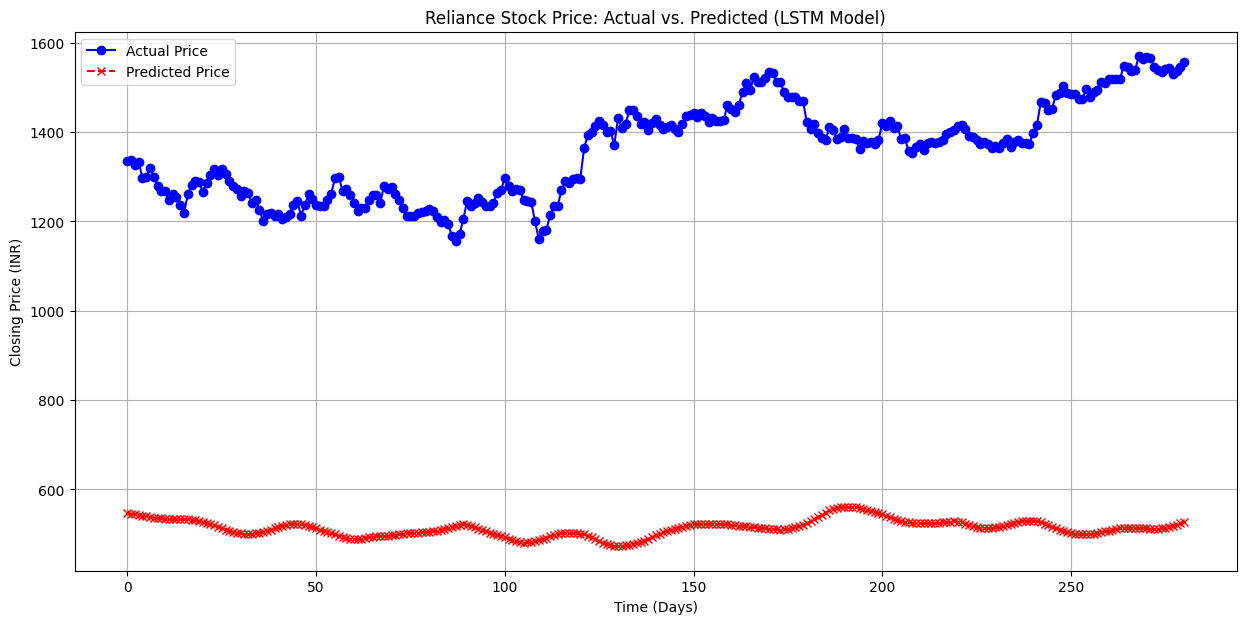

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Make Predictions on the Test Data ---
print("Making predictions on the test data...")
predictions_scaled = model.predict(X_test)

# --- 2. Inverse Scale the Predictions and Actuals ---
# We need to reshape the data to have 5 columns to match the scaler's input shape
# Create a dummy array with the same shape as the original data
dummy_array_pred = np.zeros((len(predictions_scaled), 5))
# Place our predictions into the first column (the 'Close' price column)
dummy_array_pred[:, 0] = predictions_scaled.ravel()
# Inverse transform the dummy array
predictions_actual = scaler.inverse_transform(dummy_array_pred)[:, 0]

# Do the same for the y_test actual values
dummy_array_actual = np.zeros((len(y_test), 5))
dummy_array_actual[:, 0] = y_test.ravel()
y_test_actual = scaler.inverse_transform(dummy_array_actual)[:, 0]
print("✅ Predictions have been converted back to actual Rupee values.")


# --- 3. Evaluate the Model's Performance ---
mae = mean_absolute_error(y_test_actual, predictions_actual)
r2 = r2_score(y_test_actual, predictions_actual)
print(f"\nModel Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"R-squared (R²) Score: {r2:.2f}")


# --- 4. Visualize the Results ---
plt.figure(figsize=(15, 7))
plt.plot(y_test_actual, label='Actual Price', color='blue', marker='o', linestyle='-')
plt.plot(predictions_actual, label='Predicted Price', color='red', marker='x', linestyle='--')
plt.title('Reliance Stock Price: Actual vs. Predicted (LSTM Model)')
plt.xlabel('Time (Days)')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.savefig('lstm_prediction_vs_actual.png')
plt.show()

In [17]:
print("Starting model training... this will take several minutes.")

# Train the model
# epochs=50 means the model will see the entire dataset 50 times
# batch_size=32 means the model will look at 32 samples at a time
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\n✅✅✅ Model training complete!")

Starting model training... this will take several minutes.
Epoch 1/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1:14 2s/step - loss: 0.3786

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3156

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2623

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2257

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2009

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1827

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1681

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1560

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1460

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1375

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1303

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1239

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1183

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1132

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1087

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1046

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1008

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0974

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0944 - val_loss: 0.0042


Epoch 2/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0071

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0082

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0082

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0081

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0081

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0081

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0079

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0079 - val_loss: 0.0023


Epoch 3/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0057

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0059

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0060

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0063

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0064

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0065

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0065

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0065

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0065

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0065

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0064

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0064

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0064

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0064

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0063

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0063

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0063 - val_loss: 0.0014


Epoch 4/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0043

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0047

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0048 - val_loss: 0.0013


Epoch 5/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0051

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0046

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0047

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0048

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0048

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0048

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0047

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0047

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0048

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0048 - val_loss: 0.0031


Epoch 6/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0033

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0046

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0047 - val_loss: 0.0017


Epoch 7/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0018

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0037 - val_loss: 0.0029


Epoch 8/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0061

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0053

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0052

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0052

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0051

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0051

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0050

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0050

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0049

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0049

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0048 - val_loss: 0.0037


Epoch 9/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0085

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0077

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0071

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0067

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0064

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0062

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0061

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0059

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0058

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0058

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0057

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0056

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0053 - val_loss: 0.0010


Epoch 10/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0044

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0046

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0044 - val_loss: 0.0031


Epoch 11/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0052

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0056

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0053

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0053

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0052

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0051

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0051

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0050

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0050

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0049

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0049

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0049

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0048 - val_loss: 0.0010


Epoch 12/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0040

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0039 - val_loss: 0.0011


Epoch 13/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0029

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0033 - val_loss: 9.9862e-04


Epoch 14/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0031

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0037 - val_loss: 0.0012


Epoch 15/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0056

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0043

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0039

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0037

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0034 - val_loss: 0.0012


Epoch 16/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0032

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0032 - val_loss: 0.0015


Epoch 17/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0024

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0032 - val_loss: 0.0015


Epoch 18/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0046

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0050

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0050

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0049

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0046

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0041 - val_loss: 0.0022


Epoch 19/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0037

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0034

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0034

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0034

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0032 - val_loss: 9.5589e-04


Epoch 20/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0020

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0033 - val_loss: 9.0015e-04


Epoch 21/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0020

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0028 - val_loss: 0.0018


Epoch 22/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0029

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0034 - val_loss: 0.0027


Epoch 23/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0062

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0033 - val_loss: 0.0026


Epoch 24/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0036

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0039 - val_loss: 6.6900e-04


Epoch 25/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0040

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0029 - val_loss: 6.7913e-04


Epoch 26/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0033

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0034 - val_loss: 9.4158e-04


Epoch 27/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0041

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0031 - val_loss: 9.3214e-04


Epoch 28/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0035

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0025 - val_loss: 0.0013


Epoch 29/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0022

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0032 - val_loss: 0.0011


Epoch 30/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0037

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0030 - val_loss: 8.3847e-04


Epoch 31/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0020

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0028 - val_loss: 0.0013


Epoch 32/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0024

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0024 - val_loss: 0.0012


Epoch 33/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0029

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0027 - val_loss: 0.0016


Epoch 34/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0041

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0034

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0028 - val_loss: 7.1346e-04


Epoch 35/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0023

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0026 - val_loss: 9.9561e-04


Epoch 36/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0023

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0024 - val_loss: 6.0645e-04


Epoch 37/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0017

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0026 - val_loss: 0.0011


Epoch 38/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0019

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0023 - val_loss: 5.9579e-04


Epoch 39/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0020

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0021 - val_loss: 6.3491e-04


Epoch 40/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0023

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0024 - val_loss: 6.6665e-04


Epoch 41/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0022

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0023 - val_loss: 0.0035


Epoch 42/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0022

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0025 - val_loss: 5.5840e-04


Epoch 43/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0026

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0022 - val_loss: 5.6296e-04


Epoch 44/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0016

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0022 - val_loss: 6.1769e-04


Epoch 45/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0019

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0022 - val_loss: 5.3381e-04


Epoch 46/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0021

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0023 - val_loss: 6.3668e-04


Epoch 47/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0016

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0018

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0018

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0018

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0021 - val_loss: 5.9477e-04


Epoch 48/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0028

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0021 - val_loss: 0.0023


Epoch 49/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0033

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0033 - val_loss: 6.3680e-04


Epoch 50/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0022

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0021 - val_loss: 5.7265e-04



✅✅✅ Model training complete!


In [18]:
import joblib

# Save the trained LSTM model
model.save('lstm_model.h5')
print("✅ Model has been saved in .h5 format.")

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler has been saved to scaler.pkl.")

12/15/2025 03:23:34 AM - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


✅ Model has been saved in .h5 format.
✅ Scaler has been saved to scaler.pkl.
